In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv("CO2 dataset.csv",parse_dates= True)
data.sort_values(['Year'])

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [3]:
data.sort_values(by=['CO2'])

,Year,CO2
45,1845,0.00175
44,1844,0.00181
43,1843,0.00188
42,1842,0.00195
41,1841,0.00202
...,...,...
178,1978,17.30000
200,2000,17.40000
203,2003,17.50000
180,1980,18.10000


In [4]:
data.shape

(215, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [6]:
data.isna().sum()

Year    0
CO2     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,215.0,1907.00000,62.209324,1800.00000,1853.50000,1907.00,1960.5,2014.0
CO2,215.0,6.74197,6.522437,0.00175,0.04105,6.39,11.5,18.2


In [9]:
data=data.set_index('Year')
data.index=pd.to_datetime(data.index,format='%Y')

In [10]:
df=data[60:]
df

,CO2
Year,
1860-01-01,0.118
1861-01-01,0.139
1862-01-01,0.167
1863-01-01,0.206
1864-01-01,0.242
...,...
2010-01-01,15.600
2011-01-01,15.600
2012-01-01,14.800


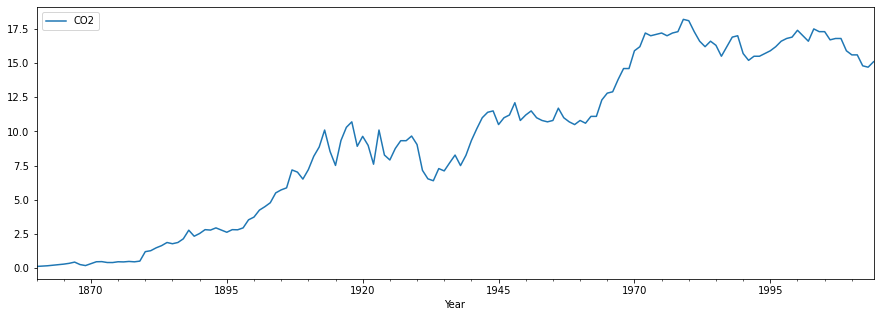

In [11]:
from matplotlib import pyplot
df.plot(figsize=(15,5))
pyplot.show()

<AxesSubplot:>

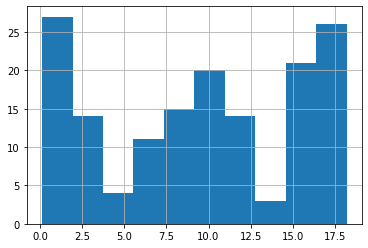

In [12]:
df.CO2.hist()

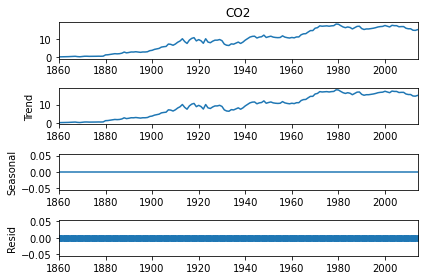

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.CO2)
decompose_ts_add.plot()
plt.show()

## Stationarity Checking

In [14]:
ImportWarning(Warning('ignore'))

ImportWarning(Warning('ignore'))

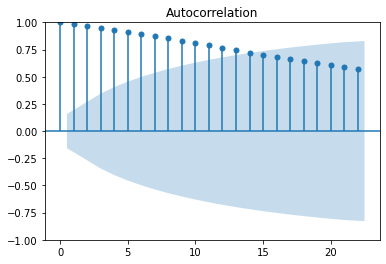

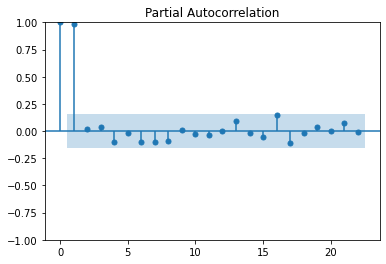

In [15]:
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['CO2'].dropna(),)
pyplot.show()

plot_pacf(df['CO2'].dropna(),)
pyplot.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
# H0 = The data is not Stationary
# H1 = The data is Stationary
def adfuller_test(co2):
    result = adfuller(co2)
    labels = ["ADF test statistic", "P-value","#Lags used","No. of obsrvations used"]
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05 :
        print('Reject H0 Hypothesis (Accept H1(Alternate) Hypothesis)'+'\x1b[0;39;43m' +"The Data is Stationary"+ '\x1b[0m')
    else:
        print('Reject H1 Hypothesis (Accept H0(Null) Hypothesis)'+'\x1b[0;39;43m' +"The Data is Not-Stationary"+ '\x1b[0m')

adfuller_test(df)

ADF test statistic : -1.2378279203846452
P-value : 0.6571151842703962
#Lags used : 0
No. of obsrvations used : 154
Reject H1 Hypothesis (Accept H0(Null) Hypothesis)The Data is Not-Stationary


In [18]:
df['diff']= df['CO2']-df['CO2'].shift(1)

In [19]:
df.head()

,CO2,diff
Year,,
1860-01-01,0.118,NaN
1861-01-01,0.139,0.021
1862-01-01,0.167,0.028
1863-01-01,0.206,0.039
1864-01-01,0.242,0.036


ADF test statistic : -12.81584229089762
P-value : 6.303170927965879e-24
#Lags used : 0
No. of obsrvations used : 153
Reject H0 Hypothesis (Accept H1(Alternate) Hypothesis)The Data is Stationary


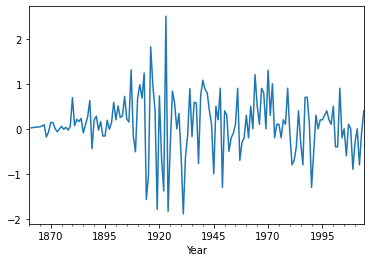

In [20]:
df['diff'].plot()
adfuller_test(df['diff'].dropna())

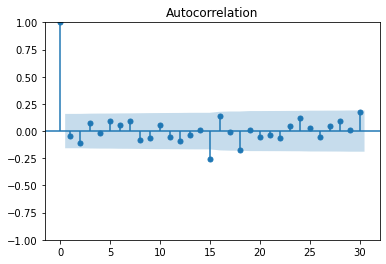

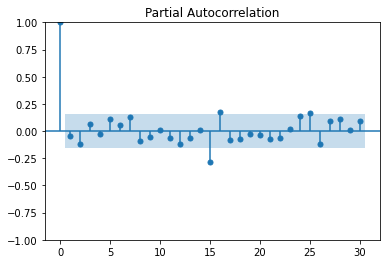

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib import pyplot
import warnings 
warnings.filterwarnings("ignore")
plot_acf(df['diff'].dropna(),lags=30)
pyplot.show()

plot_pacf(df['diff'].dropna(),lags=30)
pyplot.show()

## ARIMA

In [22]:
    from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
train = df[:116]
test = df[116:]

In [24]:
# model_arima = ARIMA(train['CO2'],order=(15,1,15),enforce_stationarity= True,
#       enforce_invertibility=True).fit()
model_arima = ARIMA(train['CO2'],order=(7,1,2)).fit()
# model_arima = ARIMA(train['CO2'],order=(3,1,5))

In [25]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  116
Model:                 ARIMA(7, 1, 2)   Log Likelihood                -112.637
Date:                Tue, 06 Sep 2022   AIC                            245.275
Time:                        10:38:43   BIC                            272.724
Sample:                    01-01-1860   HQIC                           256.416
                         - 01-01-1975                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3043      0.081     -3.747      0.000      -0.463      -0.145
ar.L2         -0.9291      0.101     -9.174      0.000      -1.128      -0.731
ar.L3          0.0686      0.106      0.645      0.519      -0.140       0.277
ar.L4         -0.0112      0.115     -0.097      0.923      -0.237       0.215
ar.L5          0.2580      0.119      2.163      0.031       0.024       0.492
ar.L6          0.1557      0.085      1.840      0.066      -0.010       0.322
ar.L7          0.1964      0.095      2.069      0.039       0.010       0.383
ma.L1          0.2670      0.054      4.983      0.000       0.162       0.372
ma.L2          0.9888      0.208      4.745      0.000       0.580       1.397
sigma2         0.4023      0.090      4.489      0.000       0.227       0.578
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 7.24
Prob(Q):                              0.64   Prob(JB):                         0.03
Heteroskedasticity (H):               9.15   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

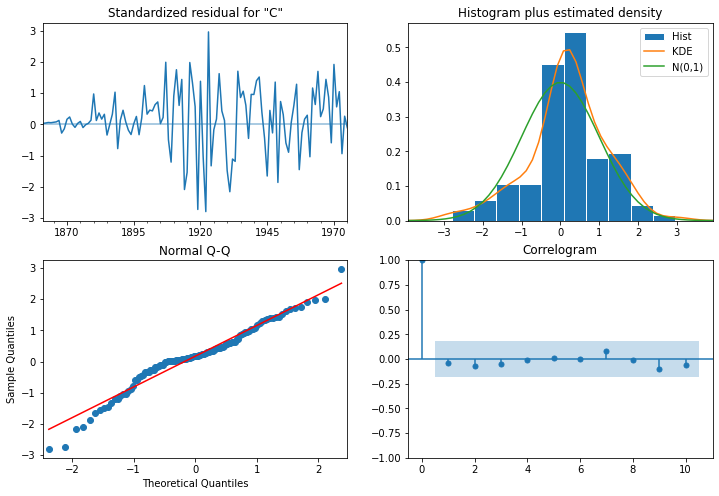

In [26]:
model_arima.plot_diagnostics(figsize=(12,8))
plt.show()

In [27]:
pred_start=test.index[0]
pred_end = test.index[-1]
print(pred_start)
print(pred_end)

1976-01-01 00:00:00
2014-01-01 00:00:00


In [28]:
pred = model_arima.predict(start= pred_start,end=pred_end)
resids= test["CO2"]-pred
pd.DataFrame([test['CO2'],pred,resids]).T

,CO2,predicted_mean,Unnamed 0
1976-01-01,17.0,17.475737,-0.475737
1977-01-01,17.2,17.800297,-0.600297
1978-01-01,17.3,17.614106,-0.314106
1979-01-01,18.2,17.578092,0.621908
1980-01-01,18.1,17.783293,0.316707
1981-01-01,17.3,17.844257,-0.544257
1982-01-01,16.6,17.780968,-1.180968
1983-01-01,16.2,17.814719,-1.614719
1984-01-01,16.6,17.890614,-1.290614
1985-01-01,16.3,17.841894,-1.541894


<AxesSubplot:ylabel='Density'>

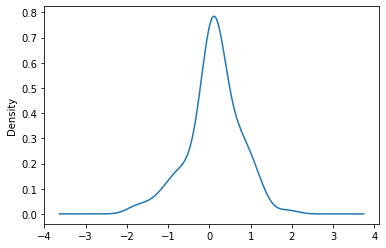

In [29]:
model_arima.resid.plot(kind='kde')

<AxesSubplot:xlabel='Year'>

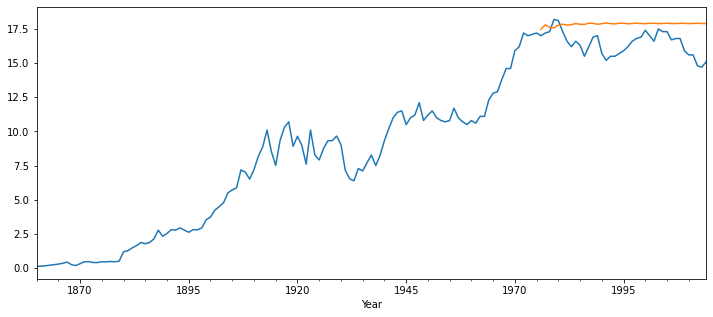

In [30]:
df['CO2'].plot(figsize=(12,5))
pred.plot()

### ARIMA model Validation

In [31]:
Arima_test_mape= (np.abs(test.CO2-pred)/test.CO2).mean()
Arima_test_rmse = np.sqrt(((test.CO2 - pred) ** 2).mean())
print("Arima_test_mape:",Arima_test_mape)
print("Arima_test_rmse:",Arima_test_rmse)   #17,1,15

Arima_test_mape: 0.09136858885191732
Arima_test_rmse: 1.6697788258074813


In [32]:
Arima_test_mape= (np.abs(test.CO2-pred)/test.CO2).mean()
Arima_test_rmse = np.sqrt(((test.CO2 - pred) ** 2).mean())
print("Arima_test_mape:",Arima_test_mape)
print("Arima_test_rmse:",Arima_test_rmse)    #15,1,15

Arima_test_mape: 0.09136858885191732
Arima_test_rmse: 1.6697788258074813


In [33]:
Arima_test_mape= (np.abs(test.CO2-pred)/test.CO2).mean()
Arima_test_rmse = np.sqrt(((test.CO2 - pred) ** 2).mean())
print("Arima_test_mape:",Arima_test_mape)
print("Arima_test_rmse:",Arima_test_rmse)    #15,1,15

Arima_test_mape: 0.09136858885191732
Arima_test_rmse: 1.6697788258074813


1860-01-01 00:00:00
1975-01-01 00:00:00
Arima_train_mape: 0.10722290376465432
Arima_train_rmse: 0.6360867821291539


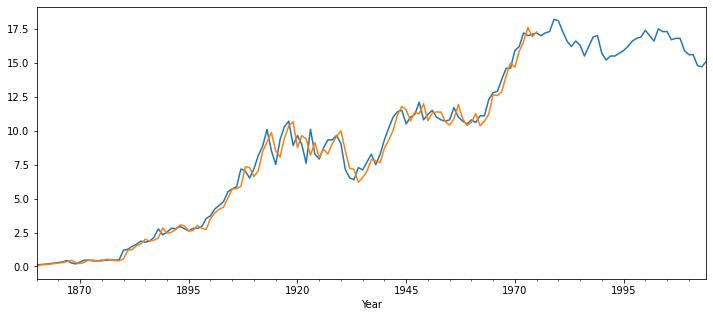

In [34]:
pred_start=train.index[0]
pred_end = train.index[-1]
print(pred_start)
print(pred_end)
pred2 = model_arima.predict(start= pred_start,end=pred_end)
df['CO2'].plot(figsize=(12,5))
pred2.plot()
Arima_train_mape= (np.abs(train.CO2-pred2)/train.CO2).mean()
Arima_train_rmse = np.sqrt(((train.CO2 - pred2) ** 2).mean())
print("Arima_train_mape:",Arima_train_mape)
print("Arima_train_rmse:",Arima_train_rmse)

1860-01-01 00:00:00
2014-01-01 00:00:00
Arima_data_mape: 0.10323375356080437
Arima_data_rmse: 1.002167436618344


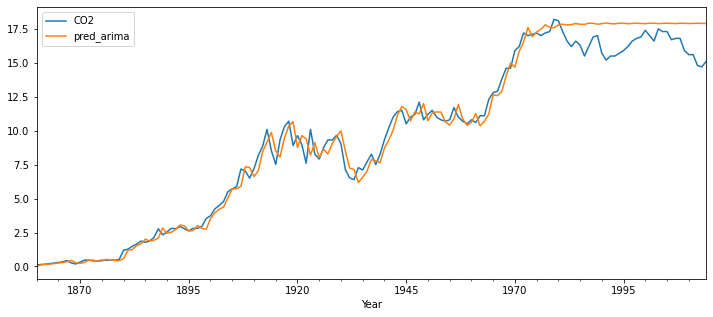

In [35]:
# metrics for whole data
pred_start=df.index[0]
pred_end = df.index[-1]
print(pred_start)
print(pred_end)
pred3 = model_arima.predict(start= pred_start,end=pred_end)
df['pred_arima']=pred3
df[['CO2','pred_arima']].plot(figsize=(12,5))
Arima_data_mape= (np.abs(df.CO2-pred3)/df.CO2).mean()
Arima_data_rmse = np.sqrt(((df.CO2 - pred3) ** 2).mean())
print("Arima_data_mape:",Arima_data_mape)
print("Arima_data_rmse:",Arima_data_rmse)

## Future forecasting with ARIMA model

In [36]:
final_arima = ARIMA(df['CO2'],order=(7,1,3)).fit()

In [37]:
forecast_arima= final_arima.predict(len(df),len(df)+int(input()))

10


<AxesSubplot:xlabel='Year'>

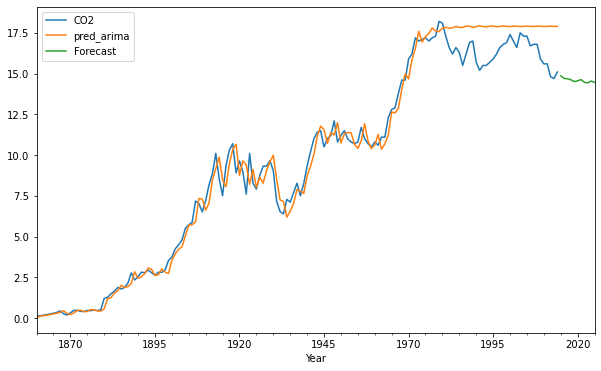

In [38]:
df[['CO2','pred_arima']].plot(legend=True, label = 'train', figsize=(10,6))
forecast_arima.plot(legend=True, label = 'Forecast')

In [39]:
forecast_arima

2015-01-01    14.863993
2016-01-01    14.703562
2017-01-01    14.681037
2018-01-01    14.619434
2019-01-01    14.508980
2020-01-01    14.555791
2021-01-01    14.633536
2022-01-01    14.464213
2023-01-01    14.431894
2024-01-01    14.544160
2025-01-01    14.462460
Freq: AS-JAN, Name: predicted_mean, dtype: float64

## Seasonal ARIMA

ADF test statistic : -3.1876270481016884
P-value : 0.02071213820408564
#Lags used : 9
No. of obsrvations used : 136
Reject H0 Hypothesis (Accept H1(Alternate) Hypothesis)The Data is Stationary


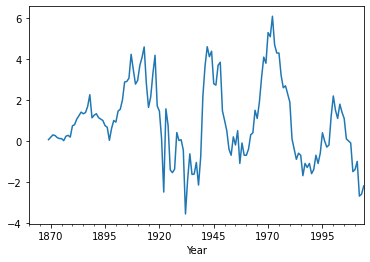

In [40]:
df['Seasonal_diff']=df['CO2']-df['CO2'].shift(9)

df['Seasonal_diff'].plot(),

adfuller_test(df['Seasonal_diff'].dropna())

In [41]:
df['Seasonal_diff']

Year
1860-01-01    NaN
1861-01-01    NaN
1862-01-01    NaN
1863-01-01    NaN
1864-01-01    NaN
             ... 
2010-01-01   -1.4
2011-01-01   -1.0
2012-01-01   -2.7
2013-01-01   -2.6
2014-01-01   -2.2
Name: Seasonal_diff, Length: 155, dtype: float64

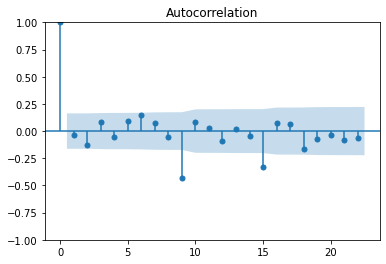

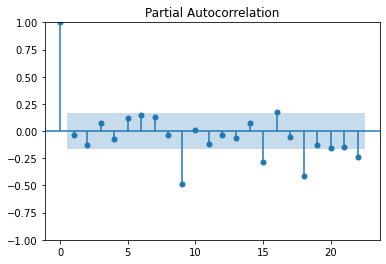

In [42]:
plot_acf(df['Seasonal_diff'].diff().dropna())
plot_pacf(df['Seasonal_diff'].diff().dropna())
pyplot.show() 

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
sarima_model= SARIMAX(train['CO2'],order=(8,1,3), seasonal_order=(8,1,3,9)).fit()

In [45]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               CO2   No. Observations:                  116
Model:             SARIMAX(8, 1, 3)x(8, 1, 3, 9)   Log Likelihood                -108.157
Date:                           Tue, 06 Sep 2022   AIC                            262.314
Time:                                   10:39:51   BIC                            323.573
Sample:                               01-01-1860   HQIC                           287.142
                                    - 01-01-1975                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3651      2.125     -0.172      0.864      -4.530       3.800
ar.L2          0.4125      2.749      0.150      0.881      -4.975       5.800
ar.L3          0.4042      1.725      0.234      0.815      -2.976       3.784
ar.L4          0.1477      0.571      0.259      0.796      -0.972       1.267
ar.L5          0.2180      0.217      1.003      0.316      -0.208       0.644
ar.L6          0.0541      0.325      0.167      0.868      -0.583       0.691
ar.L7          0.0354      0.398      0.089      0.929      -0.745       0.816
ar.L8         -0.2310      0.466     -0.496      0.620      -1.144       0.682
ma.L1          0.2131      2.281      0.093      0.926      -4.258       4.684
ma.L2         -0.5795      2.663     -0.218      0.828      -5.798       4.639
ma.L3         -0.3796      1.213     -0.313      0.754      -2.758       1.999
ar.S.L9       -1.5737     16.950     -0.093      0.926     -34.794      31.647
ar.S.L18      -1.4922     22.562     -0.066      0.947     -45.712      42.728
ar.S.L27      -1.4222     20.428     -0.070      0.944     -41.460      38.615
ar.S.L36      -1.3502     19.089     -0.071      0.944     -38.764      36.063
ar.S.L45      -1.3590     18.144     -0.075      0.940     -36.921      34.203
ar.S.L54      -1.2500     18.426     -0.068      0.946     -37.365      34.865
ar.S.L63      -0.8235     16.693     -0.049      0.961     -33.541      31.893
ar.S.L72      -0.1421      9.997     -0.014      0.989     -19.735      19.451
ma.S.L9       -0.1331     13.262     -0.010      0.992     -26.127      25.861
ma.S.L18      -0.7844     21.924     -0.036      0.971     -43.755      42.186
ma.S.L27      -0.0494     12.219     -0.004      0.997     -23.998      23.899
sigma2         0.2102      3.965      0.053      0.958      -7.561       7.981
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.08
Prob(Q):                              0.82   Prob(JB):                         0.35
Heteroskedasticity (H):               7.05   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
pred_start=test.index[0]
pred_end = test.index[-1]
print(pred_start)
print(pred_end)

1976-01-01 00:00:00
2014-01-01 00:00:00


In [47]:
sarima_pred=sarima_model.predict(start= pred_start,end=pred_end)
sarima_resids = test['CO2']-sarima_pred
pd.DataFrame([test['CO2'],sarima_pred,sarima_resids]).T

,CO2,predicted_mean,Unnamed 0
1976-01-01,17.0,17.923793,-0.923793
1977-01-01,17.2,17.474715,-0.274715
1978-01-01,17.3,16.909617,0.390383
1979-01-01,18.2,18.071591,0.128409
1980-01-01,18.1,18.294474,-0.194474
1981-01-01,17.3,17.980869,-0.680869
1982-01-01,16.6,17.222163,-0.622163
1983-01-01,16.2,18.018348,-1.818348
1984-01-01,16.6,18.034302,-1.434302
1985-01-01,16.3,17.753632,-1.453632


<AxesSubplot:ylabel='Density'>

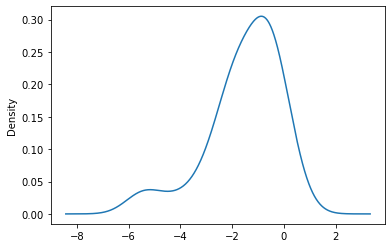

In [48]:
sarima_resids.plot(kind='kde')

<AxesSubplot:xlabel='Year'>

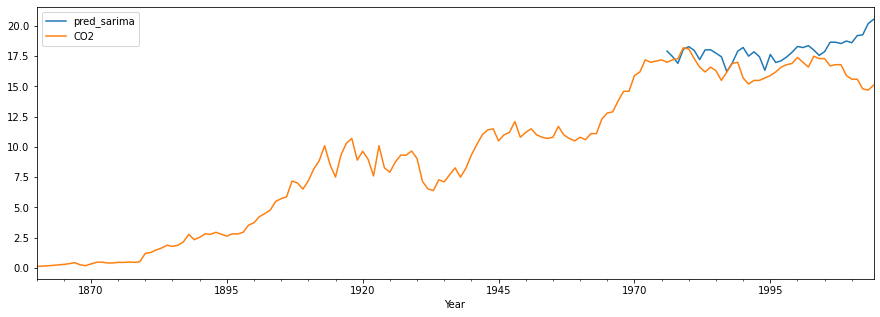

In [49]:
df['pred_sarima']=sarima_pred
df[['pred_sarima','CO2']].plot(figsize=(15,5))

In [50]:
Sarima_test_mape=(np.abs(test.CO2-df.pred_sarima)/test.CO2).mean()
Sarima_test_rmse=np.sqrt(((test.CO2 - df.pred_sarima) ** 2).mean())
print(f'Sarima_test_mape : {Sarima_test_mape}')
print(f'Sarima_test_rmse : {Sarima_test_rmse}')  #813

Sarima_test_mape : 0.09882869522193176
Sarima_test_rmse : 2.071199093644962


In [51]:
Sarima_test_mape=(np.abs(test.CO2-df.pred_sarima)/test.CO2).mean()
Sarima_test_rmse=np.sqrt(((test.CO2 - df.pred_sarima) ** 2).mean())
print(f'Sarima_test_mape : {Sarima_test_mape}')
print(f'Sarima_test_rmse : {Sarima_test_rmse}')  #712

Sarima_test_mape : 0.09882869522193176
Sarima_test_rmse : 2.071199093644962


Sarima_train_mape : 0.11097514011543348
Sarima_train_rmse : 0.6166799598666851


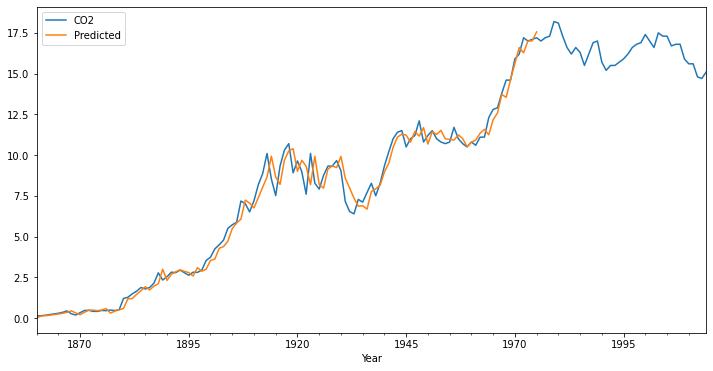

In [52]:
sarima_pred_train=sarima_model.predict(start= train.index[0],end=train.index[-1])
sarima_pred_train

df[['CO2']].plot(legend=True, label = 'train', figsize=(12,6))
sarima_pred_train.plot(legend=True, label = 'Predicted')

Sarima_train_mape= (np.abs(train.CO2-sarima_pred_train)/train.CO2).mean()
Sarima_train_rmse = np.sqrt(((train.CO2 - sarima_pred_train) ** 2).mean())
print(f'Sarima_train_mape : {Sarima_train_mape}')
print(f'Sarima_train_rmse : {Sarima_train_rmse}')

Sarima_data_mape : 0.10791893785190725
Sarima_data_rmse : 1.1679010281522262


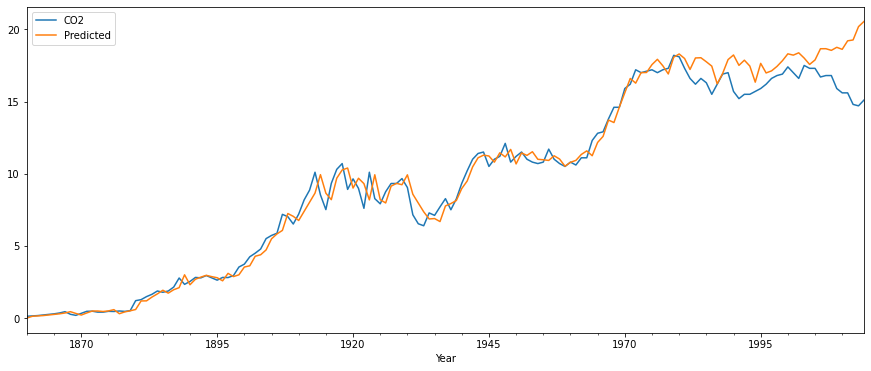

In [53]:
# Testing the model on whole data set 
sarima_pred_data=sarima_model.predict(start= df.index[0],end=df.index[-1])
sarima_resids = test['CO2']-sarima_pred
df[['CO2']].plot(legend=True, label = 'Original', figsize=(15,6))
sarima_pred_data.plot(legend=True, label = 'Predicted')
Sarima_data_mape= (np.abs(df.CO2-sarima_pred_data)/df.CO2).mean()
Sarima_data_rmse = np.sqrt(((df.CO2 - sarima_pred_data) ** 2).mean())
print(f'Sarima_data_mape : {Sarima_data_mape}')
print(f'Sarima_data_rmse : {Sarima_data_rmse}')

In [54]:
final_sarima = SARIMAX(df['CO2'],order=(8,1,3), seasonal_order=(8,1,3,9)).fit()

10
2015-01-01    15.361879
2016-01-01    15.332745
2017-01-01    15.059181
2018-01-01    15.083620
2019-01-01    15.430959
2020-01-01    15.588658
2021-01-01    15.466523
2022-01-01    15.558879
2023-01-01    15.474329
2024-01-01    16.048536
2025-01-01    16.285371
Freq: AS-JAN, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Year'>

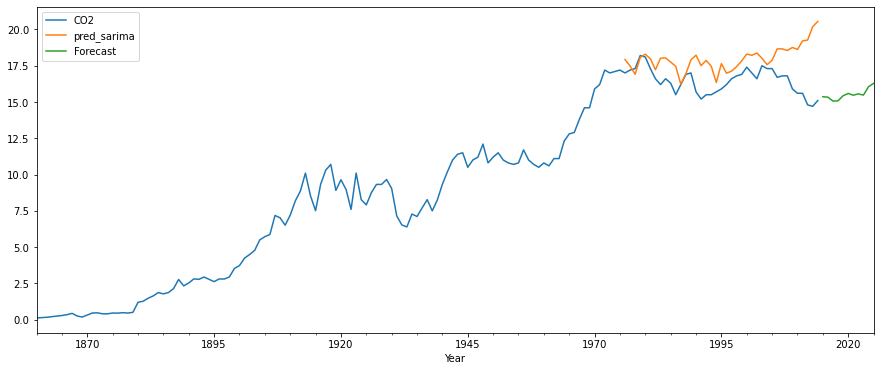

In [55]:
forecast_sarima= final_sarima.predict(len(df),len(df)+int(input()))
print(forecast_sarima)
df[['CO2','pred_sarima']].plot(legend=True, label = 'train', figsize=(15,6))
forecast_sarima.plot(legend=True, label = 'Forecast')

## ExponentialSmoothing

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

HW_test_mape : 0.05399766014110622
HW_test_rmse : 1.0649793862772627


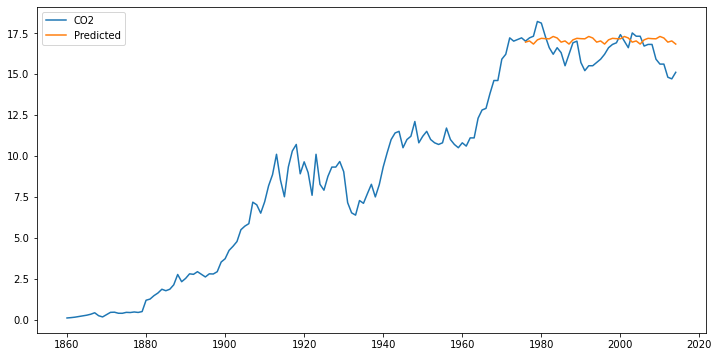

In [57]:
hwe_model1 = ExponentialSmoothing(train["CO2"],seasonal="add",trend=None,seasonal_periods=9).fit() 
pred = hwe_model1.predict(start = test.index[0],end = test.index[-1])
pred1 = pd.DataFrame(pred, index = pred.index)

HW_test_mape= (np.abs(test.CO2-pred)/test.CO2).mean()
HW_test_rmse = np.sqrt(((test.CO2 - pred) ** 2).mean())
print(f'HW_test_mape : {HW_test_mape}')
print(f'HW_test_rmse : {HW_test_rmse}')

# Plot the data
# Comparison of test data with predicted values
plt.figure(figsize=(12, 6))
plt.plot(df["CO2"], label = "CO2")
plt.plot(pred1, label = "Predicted")
plt.legend()

HW_train_mape : 0.13889205843719696
HW_train_rmse : 0.6727012477440476


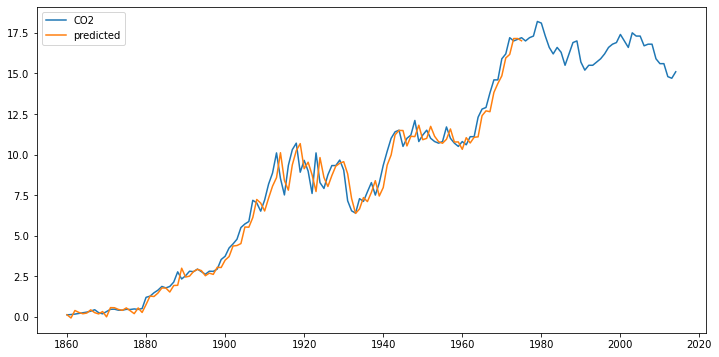

In [58]:
# Comparison with train data
hwe_model2 =  ExponentialSmoothing(train["CO2"],seasonal="add",trend=None,seasonal_periods=9).fit() 
pred = hwe_model2.predict(start = train.index[0],end = train.index[-1])
pred2 = pd.DataFrame(pred, index = pred.index)
HW_train_mape= (np.abs(train.CO2-pred)/train.CO2).mean()
HW_train_rmse = np.sqrt(((train.CO2 - pred) ** 2).mean())
print(f'HW_train_mape : {HW_train_mape}')
print(f'HW_train_rmse : {HW_train_rmse}')

plt.figure(figsize=(12, 6))
plt.plot(df["CO2"], label = "CO2")
plt.plot(pred2, label = "predicted")
plt.legend()

HW_data_mape : 0.11753153241430961
HW_data_rmse : 0.7899619876756281


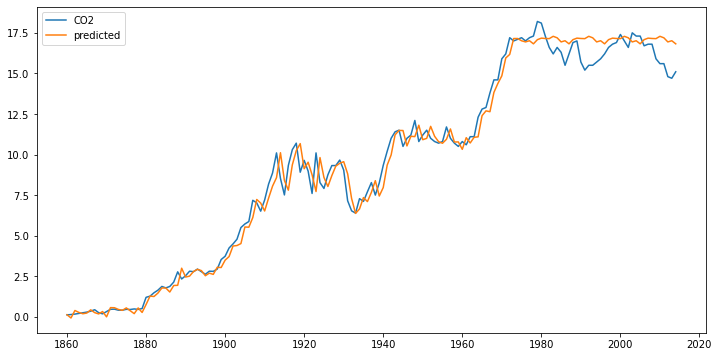

In [59]:
hwe_model3 =  ExponentialSmoothing(train["CO2"],seasonal="add",trend=None,seasonal_periods=9).fit() 
pred = hwe_model2.predict(start = df.index[0],end = df.index[-1])
pred3 = pd.DataFrame(pred, index = pred.index)
HW_data_mape= (np.abs(df.CO2-pred)/df.CO2).mean()
HW_data_rmse = np.sqrt(((df.CO2 - pred) ** 2).mean())
print(f'HW_data_mape : {HW_data_mape}')
print(f'HW_data_rmse : {HW_data_rmse}')
plt.figure(figsize=(12, 6))
plt.plot(df["CO2"], label = "CO2")
plt.plot(pred3, label = "predicted")
plt.legend()

                    0
2015-01-01  15.379642
2016-01-01  15.480867
2017-01-01  15.359849
2018-01-01  15.270792
2019-01-01  15.345286
2020-01-01  15.286541
2021-01-01  15.109199
2022-01-01  15.132100
2023-01-01  15.088991
2024-01-01  15.379642
2025-01-01  15.480867


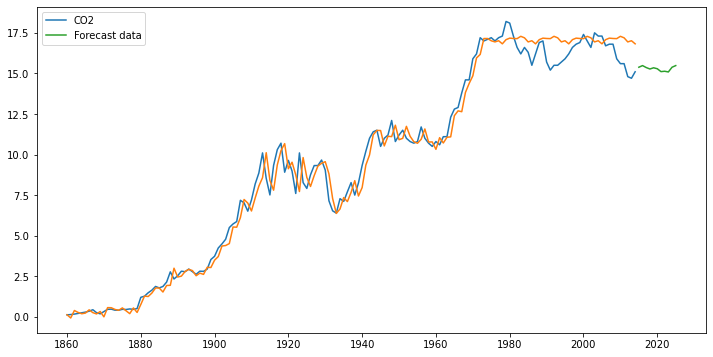

In [60]:
hwe_model_final =  ExponentialSmoothing(df["CO2"],seasonal="add",trend=None,seasonal_periods=9).fit()
future = hwe_model_final.predict(start = len(df),end = len(df)+10)
forecast_future = pd.DataFrame(future, index = future.index)
print(forecast_future)
plt.figure(figsize=(12, 6))
plt.plot(df["CO2"], label = "CO2")
plt.plot(pred3, )
plt.plot(forecast_future, label = "Forecast data")
plt.legend()


In [61]:
data= {'Data type':['Whole Data','Train data','Test data','Whole Data','Train data','Test data','Whole Data','Train data','Test data'],
       'Model':['SARIMA','SARIMA','SARIMA','ARIMA','ARIMA','ARIMA','Holt-Winter','Holt-Winter','Holt-Winter'],
      'RMSE':[Sarima_data_rmse,Sarima_train_rmse,Sarima_test_rmse,Arima_data_rmse,Arima_train_rmse,Arima_test_rmse,HW_data_rmse,HW_train_rmse,HW_test_rmse],
      'MAPE':[Sarima_data_mape,Sarima_train_mape,Sarima_test_mape,Arima_data_mape,Arima_train_mape,Arima_test_mape,HW_data_mape,HW_train_mape,HW_test_mape]}

CO2_resultls=pd.DataFrame(data)
CO2_resultls

,Data type,Model,RMSE,MAPE
0,Whole Data,SARIMA,1.167901,0.107919
1,Train data,SARIMA,0.616680,0.110975
2,Test data,SARIMA,2.071199,0.098829
3,Whole Data,ARIMA,1.002167,0.103234
4,Train data,ARIMA,0.636087,0.107223
5,Test data,ARIMA,1.669779,0.091369
6,Whole Data,Holt-Winter,0.789962,0.117532
7,Train data,Holt-Winter,0.672701,0.138892
8,Test data,Holt-Winter,1.064979,0.053998


In [62]:
CO2_resultls.to_csv("CO2_resultls.csv")

### Saving the models

In [63]:
import pickle
from pickle import dump,load

In [64]:
model1="CO2_forecast_ARIMA.sav"
pickle.dump(final_arima, open(model1, 'wb'))

In [65]:
load(open("CO2_forecast_ARIMA.sav",'rb'))

In [66]:
model2="CO2_forecast_SARIMA.sav"
pickle.dump(final_sarima, open(model2, 'wb'))
load(open('CO2_forecast_SARIMA.sav','rb'))

In [67]:
model3="CO2_forecast_Holt-Winter.sav"
pickle.dump(hwe_model_final, open(model3, 'wb'))
load(open('CO2_forecast_Holt-Winter.sav','rb'))

In [68]:
model2="CO2_forecast_SARIMA.pkl"
pickle.dump(final_sarima, open(model2, 'wb'))
load(open('CO2_forecast_SARIMA.pkl','rb'))